In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

aqi_data = pd.read_csv('aqi_data.csv')
ozone_data = pd.read_csv('ozone_data.csv')
pm_data = pd.read_csv('pm2.5_data.csv')
sf_data = pd.read_csv('sf_weather_data.csv')

# EDA

In [4]:
aqi_data['Date'] = pd.to_datetime(aqi_data['Date']).dt.strftime('%m/%d/%Y')

In [5]:
aqi_data

,Unnamed: 0,AQI,Date
0,26299,87,01/01/2007
1,26300,70,01/02/2007
2,26301,52,01/03/2007
3,26302,27,01/04/2007
4,26303,25,01/05/2007
...,...,...,...
15334,26521,36,12/27/2021
15335,26522,30,12/28/2021
15336,26523,25,12/29/2021
15337,26524,24,12/30/2021


In [6]:
ozone_data

,Unnamed: 0,Daily Max 8-hour Ozone Concentration,Date,DAILY_AQI_VALUE
0,0,0.010,01/01/2009,9
1,1,0.025,01/02/2009,23
2,2,0.024,01/03/2009,22
3,3,0.020,01/04/2009,19
4,4,0.010,01/05/2009,9
...,...,...,...,...
8277,355,0.030,12/26/2004,28
8278,356,0.024,12/27/2004,22
8279,357,0.006,12/28/2004,6
8280,358,0.039,12/29/2004,36


In [7]:
pm_data

,Unnamed: 0,Daily Mean PM2.5 Concentration,Date,DAILY_AQI_VALUE
0,0,22.1,01/01/2018,72
1,1,26.7,01/02/2018,82
2,2,39.5,01/03/2018,111
3,3,15.6,01/04/2018,58
4,4,5.2,01/05/2018,22
...,...,...,...,...
7021,190,12.3,12/19/2001,51
7022,191,4.2,12/20/2001,18
7023,192,10.4,12/22/2001,43
7024,193,9.7,12/23/2001,40


In [8]:
sf_data

,Unnamed: 0,Date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
0,0,01/01/1948,55.0,50.0,46.0,53.0,48.0,42.0,96.0,87.0,...,2.0,16.0,7.0,NaN,0.00,0.0,Fog-Rain,124<br />,San Francisco (CA),Winter
1,1,01/02/1948,57.0,55.0,53.0,56.0,53.0,51.0,93.0,91.0,...,3.0,22.0,11.0,NaN,0.00,0.0,Rain,202<br />,San Francisco (CA),Winter
2,2,01/03/1948,57.0,54.0,50.0,54.0,51.0,50.0,100.0,94.0,...,0.0,8.0,2.0,NaN,0.00,0.0,Fog,79<br />,San Francisco (CA),Winter
3,3,01/04/1948,59.0,57.0,55.0,55.0,54.0,54.0,97.0,91.0,...,3.0,18.0,7.0,NaN,0.00,0.0,Fog-Rain,191<br />,San Francisco (CA),Winter
4,4,01/05/1948,59.0,55.0,51.0,55.0,52.0,50.0,100.0,91.0,...,0.0,12.0,4.0,NaN,0.00,0.0,Fog,289<br />,San Francisco (CA),Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24738,24738,12/27/2015,48.0,41.0,34.0,37.0,34.0,29.0,82.0,71.0,...,9.0,15.0,4.0,17.0,0.01,5.0,Rain,156<br />,San Francisco (CA),Winter
24739,24739,12/28/2015,48.0,45.0,41.0,40.0,37.0,34.0,89.0,77.0,...,4.0,13.0,5.0,15.0,0.11,4.0,Rain,52<br />,San Francisco (CA),Winter
24740,24740,12/29/2015,54.0,45.0,36.0,41.0,36.0,28.0,92.0,67.0,...,10.0,12.0,3.0,13.0,0.00,1.0,NaN,250<br />,San Francisco (CA),Winter
24741,24741,12/30/2015,49.0,45.0,40.0,44.0,40.0,37.0,93.0,80.0,...,2.0,16.0,7.0,18.0,0.01,6.0,Rain,19<br />,San Francisco (CA),Winter


In [9]:
aqi_data['Year'] = aqi_data['Date'].str.slice(6, 10).astype(int)
ozone_data['Year'] = ozone_data['Date'].str.slice(6, 10).astype(int)
pm_data['Year'] = pm_data['Date'].str.slice(6, 10).astype(int)
sf_data['Year'] = sf_data['Date'].str.slice(6, 10).astype(int)

In [10]:
pd.unique(sorted(aqi_data['Year']))

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [11]:
pd.unique(sorted(ozone_data['Year']))

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [12]:
pd.unique(sorted(pm_data['Year']))

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [13]:
pd.unique(sorted(sf_data['Year']))

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015])

In [14]:
# Filter
aqi_data = aqi_data[(aqi_data['Year'] >= 1999) & (aqi_data['Year'] <= 2021)]
ozone_data = ozone_data[(ozone_data['Year'] >= 1999) & (ozone_data['Year'] <= 2021)]
pm_data = pm_data[(pm_data['Year'] >= 1999) & (pm_data['Year'] <= 2021)]
sf_data = sf_data[(sf_data['Year'] >= 1999) & (sf_data['Year'] <= 2015)]

# Merge with suffixes
merged_df = pd.merge(aqi_data, ozone_data, on='Date', how='outer', suffixes=('_aqi', '_ozone'))
merged_df = pd.merge(merged_df, pm_data, on='Date', how='outer', suffixes=('_merged', '_pm'))
merged_df = pd.merge(merged_df, sf_data, on='Date', how='outer', suffixes=('_merged', '_sf'))

# Handle missing values or duplicates
merged_df = merged_df.drop_duplicates(subset='Date')
merged_df = merged_df.fillna(method='ffill')  # Forward fill missing values

In [15]:
# Dont want duplicate years, we will use the Date column, also drop city since all the data is in SF
merged_df.drop(['Year_sf', 'Year_merged', 'Year_ozone', 'Year_aqi', 'city'], axis=1, inplace=True)

In [16]:
merged_df.Date.value_counts()

Date
01/01/2007    1
05/16/2003    1
05/14/2003    1
05/13/2003    1
05/12/2003    1
             ..
08/29/2011    1
08/28/2011    1
08/27/2011    1
08/26/2011    1
02/26/2012    1
Name: count, Length: 8401, dtype: int64

In [17]:
# Generated by ChatGPT to check if there are any missing dates between the range 01/01/1999 - 12/31/2021

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a date range for the entire period
full_date_range = pd.date_range(start='1999-01-01', end='2021-12-31')

# Identify missing dates
missing_dates = full_date_range[~full_date_range.isin(merged_df['Date'])]

# Print the missing dates
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [18]:
# Fill the 2 NaN's in Events
most_frequent_event = merged_df['Events'].mode().iloc[0]
merged_df['Events'] = merged_df['Events'].fillna(most_frequent_event)

In [19]:
pd.unique(merged_df['season'])

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [20]:
pd.unique(merged_df['Events'])

array(['Rain', 'Fog', 'Rain-Thunderstorm', 'Fog-Rain', 'Thunderstorm',
       'Rain-Hail-Thunderstorm'], dtype=object)

In [21]:
columns = ['season', 'Events']

merged_df = pd.get_dummies(merged_df, columns=columns)

In [22]:
merged_df['season_Autumn'] = merged_df['season_Autumn'].astype(float)
merged_df['season_Spring'] = merged_df['season_Spring'].astype(float)
merged_df['season_Summer'] = merged_df['season_Summer'].astype(float)
merged_df['season_Winter'] = merged_df['season_Winter'].astype(float)
merged_df['Events_Fog'] = merged_df['Events_Fog'].astype(float)    
merged_df['Events_Fog-Rain'] = merged_df['Events_Fog-Rain'].astype(float)        
merged_df['Events_Rain'] = merged_df['Events_Rain'].astype(float)   
merged_df['Events_Rain-Hail-Thunderstorm'] = merged_df['Events_Rain-Hail-Thunderstorm'].astype(float)      
merged_df['Events_Rain-Thunderstorm'] = merged_df['Events_Rain-Thunderstorm'].astype(float)    
merged_df['Events_Thunderstorm'] = merged_df['Events_Thunderstorm'].astype(float)

In [23]:
merged_df['PrecipitationIn']

0       0.00
1       0.00
2       0.01
3       0.12
4       0.00
        ... 
8436    0.00
8437    0.00
8438    0.00
8439    0.00
8440    0.00
Name: PrecipitationIn, Length: 8401, dtype: object

In [24]:
# ChatGPT
merged_df['c'] = merged_df['PrecipitationIn'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else None)

In [25]:
merged_df['PrecipitationIn']

0       0.00
1       0.00
2       0.01
3       0.12
4       0.00
        ... 
8436    0.00
8437    0.00
8438    0.00
8439    0.00
8440    0.00
Name: PrecipitationIn, Length: 8401, dtype: object

In [26]:
(merged_df['PrecipitationIn'] == 0.0).isna().sum()

0

In [27]:
merged_df['WindDirDegrees.br...'] 

0        10<br />
1       304<br />
2       156<br />
3       284<br />
4       313<br />
          ...    
8436     61<br />
8437     61<br />
8438     61<br />
8439    294<br />
8440    283<br />
Name: WindDirDegrees.br..., Length: 8401, dtype: object

In [28]:
merged_df['WindDirDegrees.br...']  = merged_df['WindDirDegrees.br...'] .replace('<br />', '', regex=True)  # Remove "<br />"
merged_df['WindDirDegrees.br...']  = merged_df['WindDirDegrees.br...'] .astype(float)  # Convert to float

In [29]:
merged_df['WindDirDegrees.br...']

0        10.0
1       304.0
2       156.0
3       284.0
4       313.0
        ...  
8436     61.0
8437     61.0
8438     61.0
8439    294.0
8440    283.0
Name: WindDirDegrees.br..., Length: 8401, dtype: float64

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8401 entries, 0 to 8440
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0_aqi                        8401 non-null   float64       
 1   AQI                                   8401 non-null   float64       
 2   Date                                  8401 non-null   datetime64[ns]
 3   Unnamed: 0_ozone                      8401 non-null   float64       
 4   Daily Max 8-hour Ozone Concentration  8401 non-null   float64       
 5   DAILY_AQI_VALUE_merged                8401 non-null   float64       
 6   Unnamed: 0_merged                     8401 non-null   float64       
 7   Daily Mean PM2.5 Concentration        8401 non-null   float64       
 8   DAILY_AQI_VALUE_pm                    8401 non-null   float64       
 9   Unnamed: 0_sf                         8401 non-null   float64       
 10  Max.T

In [31]:
merged_df = merged_df.drop(columns=['Unnamed: 0_aqi', 'Unnamed: 0_ozone', 'DAILY_AQI_VALUE_merged', 'Unnamed: 0_merged', 'DAILY_AQI_VALUE_pm', 'Unnamed: 0_sf', 'PrecipitationIn'])
merged_df = merged_df.rename(columns={'c' : 'Precipitation'})


In [32]:
most_frequent_prec = merged_df['Precipitation'].mode().iloc[0]
merged_df['Precipitation'] = merged_df['Precipitation'].fillna(most_frequent_prec)

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8401 entries, 0 to 8440
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   AQI                                   8401 non-null   float64       
 1   Date                                  8401 non-null   datetime64[ns]
 2   Daily Max 8-hour Ozone Concentration  8401 non-null   float64       
 3   Daily Mean PM2.5 Concentration        8401 non-null   float64       
 4   Max.TemperatureF                      8401 non-null   float64       
 5   Mean.TemperatureF                     8401 non-null   float64       
 6   Min.TemperatureF                      8401 non-null   float64       
 7   Max.Dew.PointF                        8401 non-null   float64       
 8   MeanDew.PointF                        8401 non-null   float64       
 9   Min.DewpointF                         8401 non-null   float64       
 10  Max.H

In [34]:
merged_df['Date'] = merged_df['Date'].astype(str)

In [35]:
import numpy as np

# Gets the day, month, and year from the 'Date' column
def time_split(df):
    df['Year'] = df['Date'].str.slice(0, 4).astype(int)
    df['Month'] = df['Date'].str.slice(5, 7).astype(int)
    df['Day'] = df['Date'].str.slice(8, 10).astype(int)

time_split(merged_df)

In [36]:
# Convert month and day into sin and cos
def feature_sin_cos(df):
    df['Month_sin'] = np.sin(df.Month * 2 * np.pi / 12)
    df['Month_cos'] = np.cos(df.Month * 2 * np.pi / 12)

    df['Day_sin'] = np.sin(df.Day * 2 * np.pi / 31)
    df['Day_cos'] = np.cos(df.Day * 2 * np.pi / 31)

feature_sin_cos(merged_df)

In [37]:
# Drop 'Day', 'Month', columns
merged_df = merged_df.drop(['Day'], axis=1)
merged_df = merged_df.drop(['Month'], axis=1)

In [38]:
merged_df['Year'] = merged_df['Year'].astype(float)

In [39]:
merged_df = merged_df.drop(['Date'], axis=1)

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8401 entries, 0 to 8440
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AQI                                   8401 non-null   float64
 1   Daily Max 8-hour Ozone Concentration  8401 non-null   float64
 2   Daily Mean PM2.5 Concentration        8401 non-null   float64
 3   Max.TemperatureF                      8401 non-null   float64
 4   Mean.TemperatureF                     8401 non-null   float64
 5   Min.TemperatureF                      8401 non-null   float64
 6   Max.Dew.PointF                        8401 non-null   float64
 7   MeanDew.PointF                        8401 non-null   float64
 8   Min.DewpointF                         8401 non-null   float64
 9   Max.Humidity                          8401 non-null   float64
 10  Mean.Humidity                         8401 non-null   float64
 11  Min.Humidity          

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(merged_df)
scaled_df = pd.DataFrame(scaled_df, columns=merged_df.columns)
scaled_df

,AQI,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,...,Events_Rain,Events_Rain-Hail-Thunderstorm,Events_Rain-Thunderstorm,Events_Thunderstorm,Precipitation,Year,Month_sin,Month_cos,Day_sin,Day_cos
0,2.419336,-1.700638,2.091679,-0.396783,-0.838044,-1.391690,-0.846713,-0.882698,-0.760777,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,-0.452257,0.715195,1.225303,0.280316,1.424110
1,1.509164,-1.916156,1.345564,-0.622514,-0.838044,-0.920951,-0.648545,-0.692219,-0.760777,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,-0.452257,0.715195,1.225303,0.550969,1.337655
2,0.545452,-0.192007,0.024573,-0.171052,-0.554203,-0.920951,0.342294,0.069698,-0.140700,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,-0.323000,-0.452257,0.715195,1.225303,0.798989,1.197502
3,-0.793037,0.131271,-0.868318,-0.735379,-0.696124,-0.607125,0.540462,-0.692219,-2.621009,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,0.204839,-0.452257,0.715195,1.225303,1.014220,1.009388
4,-0.900116,-0.299766,-1.076252,-0.961110,-0.979965,-0.920951,-2.828393,-3.739886,-3.551125,-3.213406,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,-0.452257,0.715195,1.225303,1.187852,0.781014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,-0.900116,-0.623044,-0.929475,-0.735379,-0.412282,0.020527,-0.450377,-0.120781,0.169338,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,1.658277,0.006743,1.414418,-0.554752,1.337655
8397,-0.953655,-0.192007,-0.917244,-0.735379,-0.412282,0.020527,-0.450377,-0.120781,0.169338,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,1.658277,0.006743,1.414418,-0.284099,1.424110
8398,-0.739497,-0.192007,-0.892781,-0.735379,-0.412282,0.020527,-0.450377,-0.120781,0.169338,0.236491,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,1.658277,0.006743,1.414418,-0.001891,1.453328
8399,-0.739497,-0.192007,-0.892781,-0.622514,-0.696124,-0.607125,-1.639385,-2.025573,-2.310970,-1.807893,...,0.838257,-0.015431,-0.158152,-0.052395,-0.370985,0.301505,1.233818,0.708630,-1.316558,0.521731


# Model

In [42]:
import torch

torch_x = torch.tensor(scaled_df.drop(columns=['AQI']).values)
torch_x

tensor([[-1.7006e+00,  2.0917e+00, -3.9678e-01,  ...,  1.2253e+00,
          2.8032e-01,  1.4241e+00],
        [-1.9162e+00,  1.3456e+00, -6.2251e-01,  ...,  1.2253e+00,
          5.5097e-01,  1.3377e+00],
        [-1.9201e-01,  2.4573e-02, -1.7105e-01,  ...,  1.2253e+00,
          7.9899e-01,  1.1975e+00],
        ...,
        [-1.9201e-01, -8.9278e-01, -7.3538e-01,  ...,  1.4144e+00,
         -1.8914e-03,  1.4533e+00],
        [-1.9201e-01, -8.9278e-01, -6.2251e-01,  ...,  7.0863e-01,
         -1.3166e+00,  5.2173e-01],
        [-1.9201e-01, -8.9278e-01, -9.6111e-01,  ...,  7.0863e-01,
         -1.1916e+00,  7.8101e-01]], dtype=torch.float64)

In [43]:
torch_y = torch.tensor(scaled_df['AQI'].values)
torch_y

tensor([ 2.4193,  1.5092,  0.5455,  ..., -0.7395, -0.7395, -0.7395],
       dtype=torch.float64)

In [44]:
train_x, test_x, train_y, test_y = train_test_split(torch_x, torch_y, test_size=0.15)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.17)

In [45]:
train_x.shape

torch.Size([5926, 38])

In [46]:
valid_x.shape

torch.Size([1214, 38])

In [47]:
test_x.shape

torch.Size([1261, 38])

In [48]:
from torch.utils.data import Dataset

class WeatherDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __getitem__(self, index):
        # Return a single observation and its label
        return self.features[index], self.labels[index]

    def __len__(self):
        # Return the total number of samples
        return len(self.labels)

In [49]:
from torch.utils.data import DataLoader

# Split the data into training and validation sets if not already done
train_dataset = WeatherDataset(train_x, train_y)
valid_dataset = WeatherDataset(valid_x, valid_y)
test_dataset = WeatherDataset(test_x, test_y)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=2)
valid_loader = DataLoader(valid_dataset, batch_size=2)
test_loader = DataLoader(test_dataset, batch_size=2)

## LSTM

In [50]:
import torch.nn.functional as F
import torch.nn as nn
from torch.nn import Module, LSTM, Dropout, Linear, Softmax

# Define model parameters
input_size = 38  # Number of features
hidden_size = 50  # Number of features in hidden state
num_layers = 2  # Number of stacked LSTM layers
output_size = 1  # Number of output classes
batch_size = 2

class LSTMWeatherPredictor(Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMWeatherPredictor, self).__init__()

        self.lstm = LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = Dropout(0.5)  # Should be a hyperparameter
        self.fc = Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden = (torch.zeros(num_layers, batch_size, hidden_size).to(x.device),
                  torch.zeros(num_layers, batch_size, hidden_size).to(x.device))

        x, hidden = self.lstm(x, hidden)
        x = x[:, -1, :]  # Select the last time step

        x = self.dropout(x)
        x = self.fc(x)

        return x

In [51]:
lstm = LSTMWeatherPredictor(input_size, hidden_size, num_layers, output_size)

In [52]:
print(lstm)

LSTMWeatherPredictor(
  (lstm): LSTM(38, 50, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [53]:
from torch.optim import Adam
from torch.nn import MSELoss

learning_rate = 0.0001
criterion = nn.MSELoss()  # Use Binary Cross Entropy Loss
optimizer = Adam(lstm.parameters(), lr=learning_rate)

## Training Loop and Results

In [54]:
from sklearn.metrics import r2_score
import math

epochs = 10

epoch_num = []
loss_train = []
loss_valid = []

for epoch in range(epochs):
    epoch_num.append(epoch)
    train_loss = 0.
    valid_loss = 0.

    # Training
    lstm.train()
    train_predictions = []
    for features, target in train_loader:
        optimizer.zero_grad()
        features = features.view(features.size(0), -1, input_size).float()
        output = lstm(features)
        loss = criterion(output.squeeze(), target.float())
        loss.backward()
        optimizer.step()
        train_predictions.extend(output.cpu().detach().numpy())

    train_rs = r2_score(train_y.numpy(), train_predictions)
    print('Epoch', epoch, 'train RS:', train_rs)

    # Validation
    lstm.eval()
    valid_predictions = []
    for features, target in valid_loader:
        features = features.view(features.size(0), -1, input_size).float()
        output = lstm(features)
        valid_predictions.extend(output.cpu().detach().numpy())

    valid_rs = r2_score(valid_y.numpy(), valid_predictions)
    print('Epoch', epoch, 'valid RS:', valid_rs)

Epoch 0 train RS: 0.21256671718446518
Epoch 0 valid RS: 0.509992291562136
Epoch 1 train RS: 0.6565916947886719
Epoch 1 valid RS: 0.7438463060114942
Epoch 2 train RS: 0.7578089524000383
Epoch 2 valid RS: 0.7806603823671135
Epoch 3 train RS: 0.7819513456561374
Epoch 3 valid RS: 0.7928849265217495
Epoch 4 train RS: 0.7984200593355466
Epoch 4 valid RS: 0.8035852499644738
Epoch 5 train RS: 0.8040322321237281
Epoch 5 valid RS: 0.8098732273749587
Epoch 6 train RS: 0.8104966120141764
Epoch 6 valid RS: 0.815651993004942
Epoch 7 train RS: 0.8170316192693342
Epoch 7 valid RS: 0.8186413357456537
Epoch 8 train RS: 0.822573988670012
Epoch 8 valid RS: 0.8226693457266632
Epoch 9 train RS: 0.8347423506117287
Epoch 9 valid RS: 0.8257620408144358


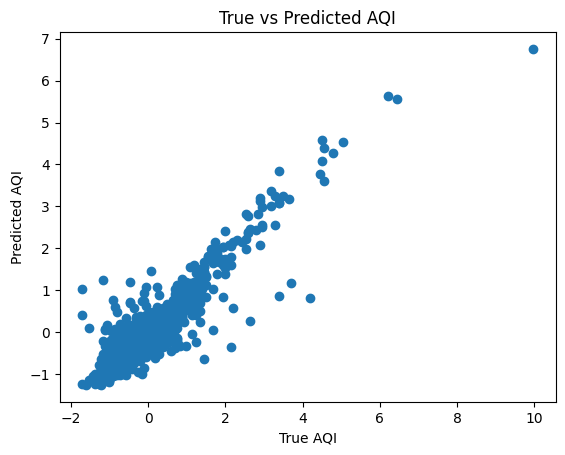

In [55]:
import matplotlib.pyplot as plt

# Assuming valid_y and valid_predictions are NumPy arrays
fig = plt.figure()
fig.figsize=(20,100)
plt.scatter(valid_y, valid_predictions)
plt.xlabel('True AQI')
plt.ylabel('Predicted AQI')
plt.title('True vs Predicted AQI')
plt.show()

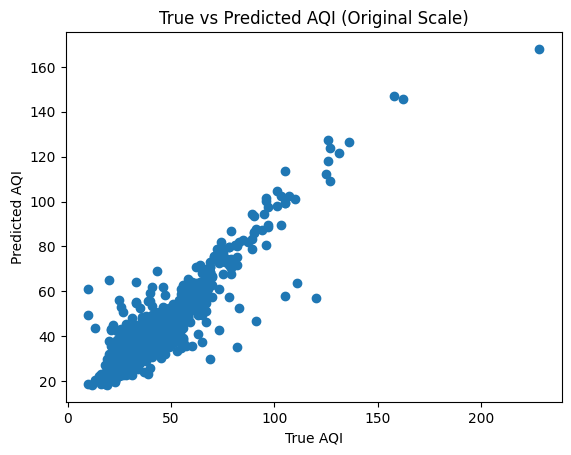

In [59]:
# Creating a dummy array with the same shape as the original scaled data
dummy_array = np.zeros((len(valid_predictions), 39))
dummy_array_2 = np.zeros((len(valid_predictions), 39))

# Replace the target column in the dummy array with your predictions
target_column_index = 0 # AQI column
dummy_array[:, target_column_index] = np.array(valid_predictions).flatten()
dummy_array_2[:, target_column_index] = np.array(valid_y).flatten()

# Inverse transform the dummy array
original_predictions = scaler.inverse_transform(dummy_array)
original_y = scaler.inverse_transform(dummy_array_2)

# Extract the target column from the transformed data
original_predictions = original_predictions[:, target_column_index]
original_y = original_y[:, target_column_index]

# Plotting
import matplotlib.pyplot as plt

fig = plt.figure()
fig.figsize = (20, 100)
plt.scatter(original_y, original_predictions) 
plt.xlabel('True AQI')
plt.ylabel('Predicted AQI')
plt.title('True vs Predicted AQI (Original Scale)')
plt.show()
